In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb


In [2]:
# cargar base de https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv")
df

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380
4,4,709,3,2014-01-22,1477,1,1,0,0,11647
...,...,...,...,...,...,...,...,...,...,...
640835,712040,674,6,2014-09-20,611,1,0,0,0,4702
640836,712041,1014,4,2015-01-15,1267,1,1,0,0,12545
640837,712042,135,6,2015-06-20,595,1,0,0,0,5823
640838,712043,810,1,2014-08-18,599,1,1,0,1,7986


In [11]:
# Tipos de datos
df.dtypes

True_index                      int64
Store_ID                        int64
Day_of_week                     int64
Date                   datetime64[ns]
Nb_customers_on_day             int64
Open                            int64
Promotion                       int64
State_holiday                   int32
School_holiday                  int64
Sales                           int64
dtype: object

In [4]:
# Valores unicos en state_holiday
df['State_holiday'].unique()

array(['0', 'c', 'a', 'b'], dtype=object)

In [5]:
# Valores a = 1, b = 2, c = 3
df['State_holiday'].replace({'a': 1, 'b': 2, 'c': 3}, inplace=True)
df

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380
4,4,709,3,2014-01-22,1477,1,1,0,0,11647
...,...,...,...,...,...,...,...,...,...,...
640835,712040,674,6,2014-09-20,611,1,0,0,0,4702
640836,712041,1014,4,2015-01-15,1267,1,1,0,0,12545
640837,712042,135,6,2015-06-20,595,1,0,0,0,5823
640838,712043,810,1,2014-08-18,599,1,1,0,1,7986


In [6]:
# Cambiar valores numericos en State_holiday
df['State_holiday'] = df['State_holiday'].astype(int)


In [7]:
# Cambiamos a datetime
df['Date'] = pd.to_datetime(df['Date'])
df

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380
4,4,709,3,2014-01-22,1477,1,1,0,0,11647
...,...,...,...,...,...,...,...,...,...,...
640835,712040,674,6,2014-09-20,611,1,0,0,0,4702
640836,712041,1014,4,2015-01-15,1267,1,1,0,0,12545
640837,712042,135,6,2015-06-20,595,1,0,0,0,5823
640838,712043,810,1,2014-08-18,599,1,1,0,1,7986


<Axes: >

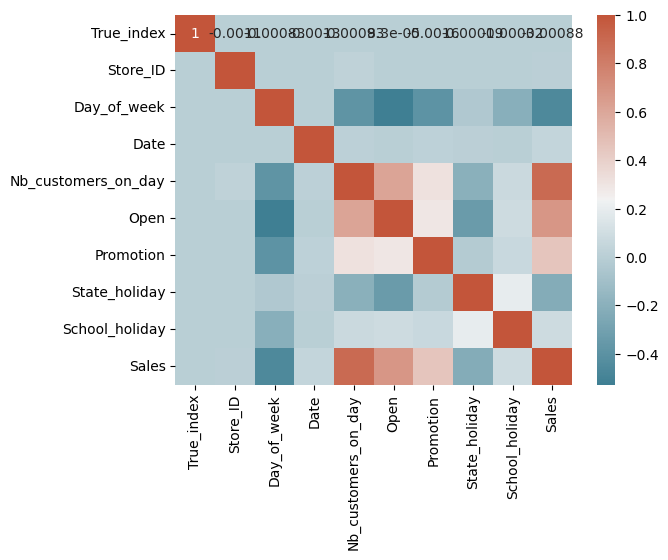

In [10]:
# Mapa calor de correlacion
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


## Random forest

In [15]:
# 2. Selección de características para el modelo
# Eliminamos "True_index" y "Date" ya que no son relevantes
X = df.drop(columns=['Sales', 'True_index', 'Date'])
y = df['Sales']

# 3. División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenamiento del modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 5. Predicción en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# 6. Evaluación del modelo (RMSE)
rmse = mean_absolute_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Opcional: ver la importancia de las características
importances = rf_model.feature_importances_
feature_names = X.columns
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


RMSE: 708.4471087392477
Store_ID: 0.1022
Day_of_week: 0.0111
Nb_customers_on_day: 0.8611
Open: 0.0000
Promotion: 0.0235
State_holiday: 0.0002
School_holiday: 0.0020


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 1. Preprocesamiento: Extraer características útiles de la fecha (si no se han extraído previamente)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# 2. Selección de características para el modelo
X = df.drop(columns=['Sales', 'True_index', 'Date'])
y = df['Sales']

# 3. División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Definición del modelo
rf = RandomForestRegressor(random_state=42)

# 5. Definición de los parámetros a optimizar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_features': ['auto', 'sqrt'],  # Número de características a considerar para la mejor división
    'max_depth': [None, 10, 20, 30],    # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],    # Mínimo número de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4]        # Mínimo número de muestras necesarias para estar en una hoja
}

# 6. Configuración del Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# 7. Entrenamiento del modelo con Grid Search
grid_search.fit(X_train, y_train)

# 8. Mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# 9. Predicción y evaluación en el conjunto de prueba
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
rmse = mean_absolute_error(y_test, y_pred, squared=False)
print(f"RMSE del modelo optimizado: {rmse}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits


## Regresion Lineal

In [20]:
# 1. Extraer características útiles de la fecha (como año, mes, día)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# 2. Selección de características para el modelo
# Eliminamos "True_index" y "Date" ya que no son relevantes
X = df.drop(columns=['Sales', 'True_index', 'Date'])
y = df['Sales']

# 3. División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenamiento del modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 5. Predicción en el conjunto de prueba
y_pred = lr_model.predict(X_test)

# 6. Evaluación del modelo (RMSE)
rmse = mean_absolute_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# 7. Coeficientes del modelo
coeficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coeficiente'])
print(coeficients)

RMSE: 1483.615976904835
                     Coeficiente
Store_ID               -0.146098
Day_of_week           -70.187716
Nb_customers_on_day     6.051950
Open                 1554.110249
Promotion            1275.607120
State_holiday        -373.690856
School_holiday         48.450180
Year                  143.816927
Month                  35.334122
Day                     1.527706


## XGBoost RMSE

In [22]:
# 1. Preprocesamiento: Extraer características útiles de la fecha (como año, mes, día)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# 2. Selección de características para el modelo
# Eliminamos "True_index" y "Date" ya que no son relevantes para la predicción
X = df.drop(columns=['Sales', 'True_index', 'Date'])
y = df['Sales']

# 3. División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Convertir el conjunto de datos en la estructura adecuada para XGBoost
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)

# 5. Entrenamiento del modelo XGBoost
xg_reg.fit(X_train, y_train)

# 6. Predicción en el conjunto de prueba
y_pred = xg_reg.predict(X_test)

# 7. Evaluación del modelo (RMSE)
rmse = mean_absolute_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")


RMSE: 1294.914622051935


## LightGBM

In [26]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Preprocesamiento: Extraer características útiles de la fecha (como año, mes, día)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# 2. Selección de características para el modelo
# Eliminamos "True_index" y "Date" ya que no son relevantes para la predicción
X = df.drop(columns=['Sales', 'True_index', 'Date'])
y = df['Sales']

# 3. División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Crear el dataset LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# 5. Parámetros del modelo LightGBM
params = {
    'objective': 'regression',  # Regresión para predecir ventas
    'metric': 'rmse',           # Utilizamos RMSE como métrica de evaluación
    'learning_rate': 0.1,       # Tasa de aprendizaje
    'num_leaves': 31,           # Número máximo de hojas en cada árbol
    'feature_fraction': 0.9,    # Subconjunto de características para entrenamiento
    'bagging_fraction': 0.8,    # Subconjunto de filas para entrenamiento
    'bagging_freq': 5,          # Frecuencia del bagging
    'max_depth': 7,             # Profundidad máxima del árbol
    'verbose': -1               # Sin mensajes detallados
}

# 6. Entrenamiento del modelo LightGBM
lgb_model = lgb.train(params, train_data, num_boost_round=200, valid_sets=[test_data])

# 7. Predicción en el conjunto de prueba
y_pred = lgb_model.predict(X_test)

# 8. Evaluación del modelo (RMSE)
rmse = mean_absolute_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")



RMSE: 1069.1106333796474
